5. Perform logistic regression to classify if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Generate the confusion matrix and evaluate the quality of the model by computing relevant performance metrics including Precision, Recall, accuracy, F1-Score etc. Plot the ROC curve and calculate AUC.
Dataset: samples_cancer.csv

Target Distribution:
 Class
2    458
4    241
Name: count, dtype: int64


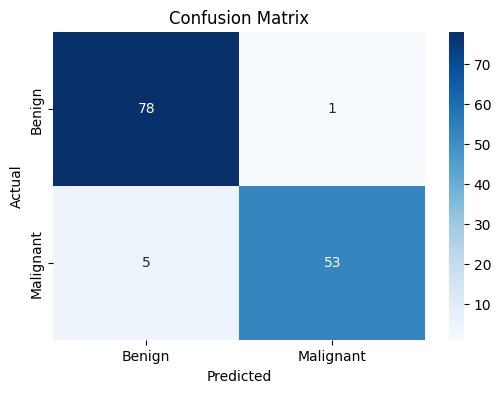

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



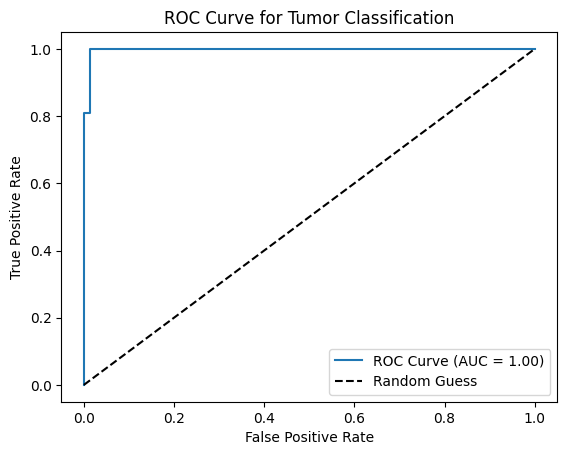

AUC: 0.9976


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


# Load dataset
df = pd.read_csv('samples_cancer.csv')

# Check column names and target distribution
print("Target Distribution:\n", df['Class'].value_counts())

# Prepare features (X) and target (y)
X = df.drop(['ID', 'Class'], axis=1)  # Features (exclude 'ID' and 'Class')
y = df['Class'].replace({2: 0, 4: 1})  # Target (2 for Benign, 4 for Malignant -> 0 for Benign, 1 for Malignant)

# Handle missing values (if any)
X = X.replace('?', np.nan)  # Replace '?' with NaN
X = X.dropna()  # Drop rows with missing values
y = y[X.index]  # Align target with cleaned features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
# plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tumor Classification')
plt.legend()
plt.show()

print(f"AUC: {auc:.4f}")

The provided code performs **logistic regression** to classify whether a tumor is benign or malignant based on the features in the dataset `samples_cancer.csv`. Below is a detailed explanation of the code:

---

### **1. Import Required Libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

- **`pandas`**: For loading and manipulating the dataset.
- **`numpy`**: For numerical computations.
- **`matplotlib.pyplot`**: For visualizing the results (e.g., confusion matrix, ROC curve).
- **`seaborn`**: For enhanced visualization of the confusion matrix.
- **`sklearn.model_selection`**: For splitting the dataset into training and testing sets.
- **`sklearn.linear_model`**: For implementing logistic regression.
- **`sklearn.metrics`**: For evaluating the model using metrics like confusion matrix, classification report, ROC curve, and AUC.

---

### **2. Load the Dataset**


In [3]:
df = pd.read_csv('samples_cancer.csv')

- The dataset is loaded into a pandas DataFrame from the file `samples_cancer.csv`.

---

### **3. Check Target Distribution**


In [4]:
print("Target Distribution:\n", df['Class'].value_counts())

Target Distribution:
 Class
2    458
4    241
Name: count, dtype: int64


- Displays the distribution of the target variable (`Class`), which indicates whether the tumor is benign (`2`) or malignant (`4`).

---

### **4. Prepare Features and Target**


In [5]:
X = df.drop(['ID', 'Class'], axis=1)  # Features (exclude 'ID' and 'Class')
y = df['Class'].replace({2: 0, 4: 1})  # Target (2 for Benign, 4 for Malignant -> 0 for Benign, 1 for Malignant)

- **`X`**: Contains all columns except `ID` (irrelevant for classification) and `Class` (target variable).
- **`y`**: Maps the target variable `Class`:
  - `2` (Benign) → `0`
  - `4` (Malignant) → `1`

---

### **5. Handle Missing Values**


In [6]:
X = X.replace('?', np.nan)  # Replace '?' with NaN
X = X.dropna()  # Drop rows with missing values
y = y[X.index]  # Align target with cleaned features

- Replaces invalid entries (`'?'`) in the features with `NaN`.
- Drops rows with missing values from `X`.
- Ensures the target variable `y` is aligned with the cleaned features.

---

### **6. Split Data into Training and Testing Sets**


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Splits the dataset into training (80%) and testing (20%) sets.
- **`random_state=42`** ensures reproducibility of the split.

---

### **7. Train Logistic Regression Model**


In [8]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- Initializes a logistic regression model with a maximum of 1000 iterations (`max_iter=1000`) to ensure convergence.
- Fits the model to the training data (`X_train`, `y_train`).

---

### **8. Make Predictions**


In [9]:
y_pred = model.predict(X_test)  # Predicted class labels
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

- **`y_pred`**: Predicted class labels (0 for benign, 1 for malignant) for the test set.
- **`y_proba`**: Predicted probabilities for the positive class (malignant) for the test set, used for the ROC curve.

---

### **9. Confusion Matrix**


In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

- Computes the confusion matrix, which shows:
  - **True Positives (TP)**: Malignant tumors correctly classified as malignant.
  - **True Negatives (TN)**: Benign tumors correctly classified as benign.
  - **False Positives (FP)**: Benign tumors incorrectly classified as malignant.
  - **False Negatives (FN)**: Malignant tumors incorrectly classified as benign.

#### Plot Confusion Matrix:


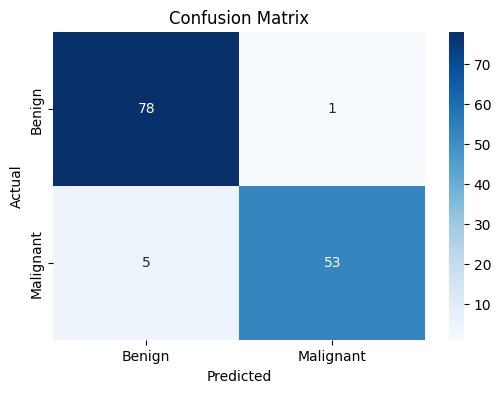

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Visualizes the confusion matrix using Seaborn with labels for benign and malignant tumors.

---

### **10. Classification Report**


In [12]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



- Prints a detailed classification report, including:
  - **Precision**: Proportion of correctly predicted positive cases out of all predicted positive cases.
  - **Recall (Sensitivity)**: Proportion of correctly predicted positive cases out of all actual positive cases.
  - **F1-Score**: Harmonic mean of precision and recall.
  - **Accuracy**: Overall proportion of correctly classified cases.

---

### **11. ROC Curve and AUC**
#### Compute ROC Curve and AUC:


In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

- **`fpr`**: False Positive Rate.
- **`tpr`**: True Positive Rate.
- **`thresholds`**: Thresholds used to compute the ROC curve.
- **`auc`**: Area Under the Curve (AUC), which measures the model's ability to distinguish between classes (closer to 1 is better).

#### Plot ROC Curve:


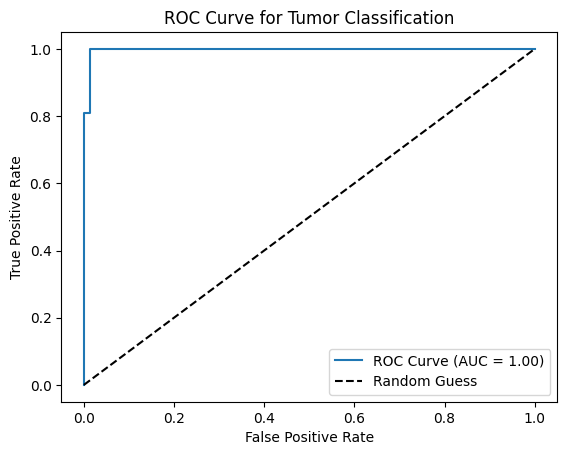

In [14]:
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tumor Classification')
plt.legend()
plt.show()

- Plots the ROC curve with the AUC score displayed in the legend.
- Includes a diagonal reference line (`y = x`) representing random guessing.

---

### **12. Print AUC**


In [15]:
print(f"AUC: {auc:.4f}")

AUC: 0.9976


- Prints the AUC score, which quantifies the model's performance.

---

### **Key Outputs**
1. **Confusion Matrix**:
   - Visualizes the classification results (TP, TN, FP, FN).
2. **Classification Report**:
   - Includes precision, recall, F1-score, and accuracy for each class.
3. **ROC Curve**:
   - Plots the trade-off between TPR and FPR at different thresholds.
4. **AUC**:
   - Measures the overall performance of the model (closer to 1 is better).

---

### **Summary**
- The code implements logistic regression to classify tumors as benign or malignant.
- It evaluates the model using metrics like confusion matrix, precision, recall, F1-score, accuracy, ROC curve, and AUC.
- The results are visualized using Seaborn (confusion matrix) and Matplotlib (ROC curve).

Similar code found with 1 license type

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.89      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95      

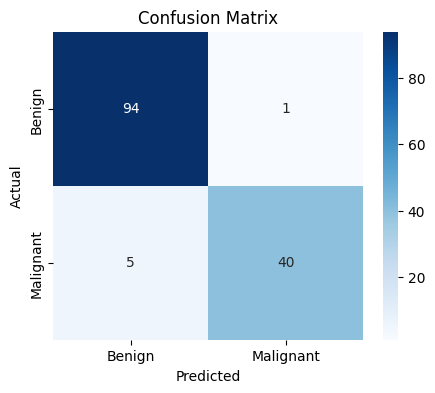

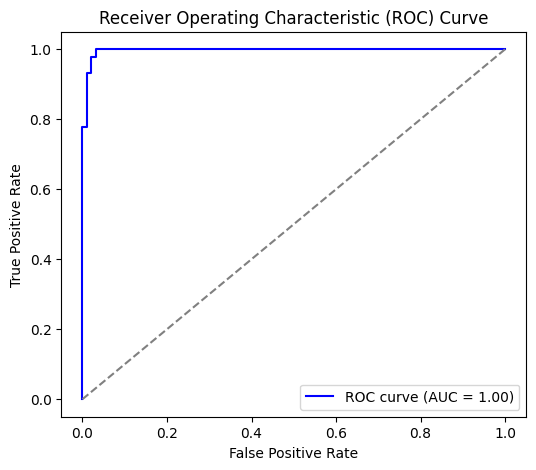

Accuracy: 0.9571
Precision: 0.9756
Recall: 0.8889
F1 Score: 0.9302
AUC Score: 0.9967


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Load the dataset
df = pd.read_csv('samples_cancer.csv')

# Display dataset info
print("Dataset Info:")
print(df.info())

# Drop 'ID' column as it's not relevant for classification
df.drop(columns=['ID'], inplace=True)

# Convert 'BareNuc' column to numeric (if it contains '?' replace with NaN)
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

# Fill missing values with median of the column
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class'].map({2: 0, 4: 1})  # Map benign (2) → 0, malignant (4) → 1

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print Evaluation Scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")
